### Support Vector Classification

In [1]:
from __future__ import division, print_function
import numpy as np
from sklearn import datasets, svm 
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\sudip\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Load the Iris DataSet:

In [2]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Evaluate performance of SVM classifier with different Kernels

In [3]:
def evaluate_on_test_data(model=None):
    predictions = model.predict(X_test)
    correct_classifications = 0
    for i in range(len(y_test)):
        if predictions[i] == y_test[i]:
            correct_classifications += 1
    accuracy = 100*correct_classifications/len(y_test) #Accuracy as a percentage
    return accuracy

kernels = ('linear','poly','rbf')
accuracies = []
for index, kernel in enumerate(kernels):
    model = svm.SVC(kernel=kernel)
    model.fit(X_train, y_train)
    acc = evaluate_on_test_data(model)
    accuracies.append(acc)
    print("{} % accuracy obtained with kernel = {}".format(acc, kernel))

84.21052631578948 % accuracy obtained with kernel = linear
81.57894736842105 % accuracy obtained with kernel = poly
84.21052631578948 % accuracy obtained with kernel = rbf


### Visualize the Decision Boundary

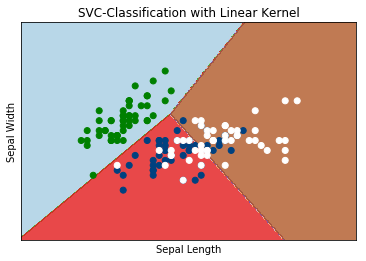

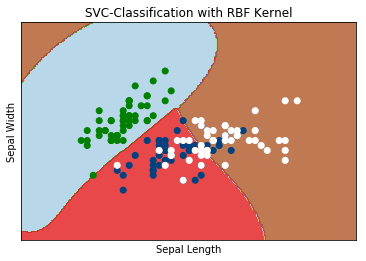

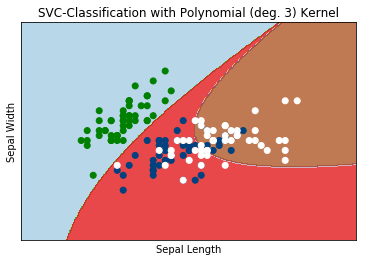

In [4]:
#Train SVMs with different kernels
lin_svc = svm.SVC(kernel='linear').fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7).fit(X_train, y_train)
pol_svc = svm.SVC(kernel='poly', degree=3).fit(X_train, y_train)

#Create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#Define title for the plots
titles = ['SVC-Classification with Linear Kernel',
          'SVC-Classification with RBF Kernel',
          'SVC-Classification with Polynomial (deg. 3) Kernel']


for i, clf in enumerate((lin_svc, rbf_svc, pol_svc)):
    plt.figure(i)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.ocean)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

#### Check the Support Vectors, Using Boston Dataset

In [5]:
# Print first 10 Support Vectors
print("The support vectors are:\n", lin_svc.support_vectors_[:10])

The support vectors are:
 [[5.4 3.7]
 [5.2 3.4]
 [5.  3. ]
 [4.9 3.1]
 [4.5 2.3]
 [4.9 3.1]
 [4.9 3. ]
 [5.4 3.4]
 [5.8 4. ]
 [6.  3.4]]


### Support Vector Regression

In [6]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Evaluate Performance using SVM with different Kernels

In [7]:
def evaluate_on_test_data(model=None):
    predictions = model.predict(X_test)
    sum_of_squared_error = 0
    for i in range(len(y_test)):
        err = (predictions[i]-y_test[i]) **2
        sum_of_squared_error += err
    mean_squared_error = sum_of_squared_error/len(y_test)
    RMSE = np.sqrt(mean_squared_error) 
    return RMSE

kernels = ('linear','rbf')
RMSE_vec = []
for index, kernel in enumerate(kernels):
    model = svm.SVR(kernel=kernel)
    model.fit(X_train, y_train)
    RMSE = evaluate_on_test_data(model)
    RMSE_vec.append(RMSE)
    print("RMSE={} obtained with kernel = {}".format(RMSE, kernel))

RMSE=5.305100811348274 obtained with kernel = linear
RMSE=8.280264820347222 obtained with kernel = rbf
